In [132]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 9.1

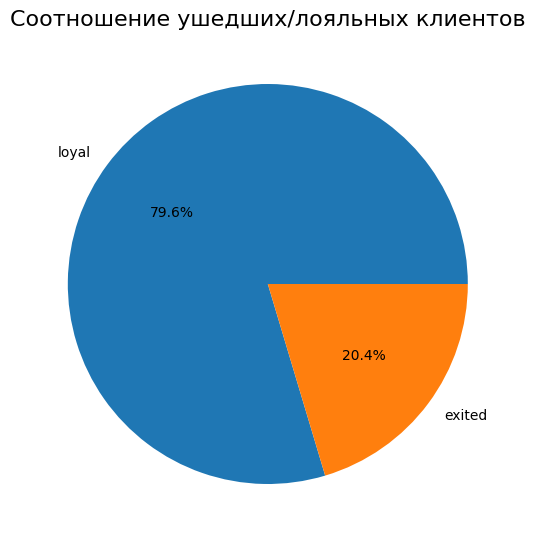

In [143]:
churn_data['ExitedClient'] = churn_data['Exited'].apply(lambda x: 'loyal' if x==0 else 'exited') #новый столбец с обозначением ушедшего/лояльного клиента для подписей на графиках
exited_clients = churn_data['ExitedClient'].value_counts() #считаем количество ушедших/лояльных клиентов
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(exited_clients, labels=exited_clients.index, autopct='%.1f%%');
axes.set_title('Соотношение ушедших/лояльных клиентов', fontsize=16);


Ушло чуть больше 20% от всего количества клиентов.

# 9.2

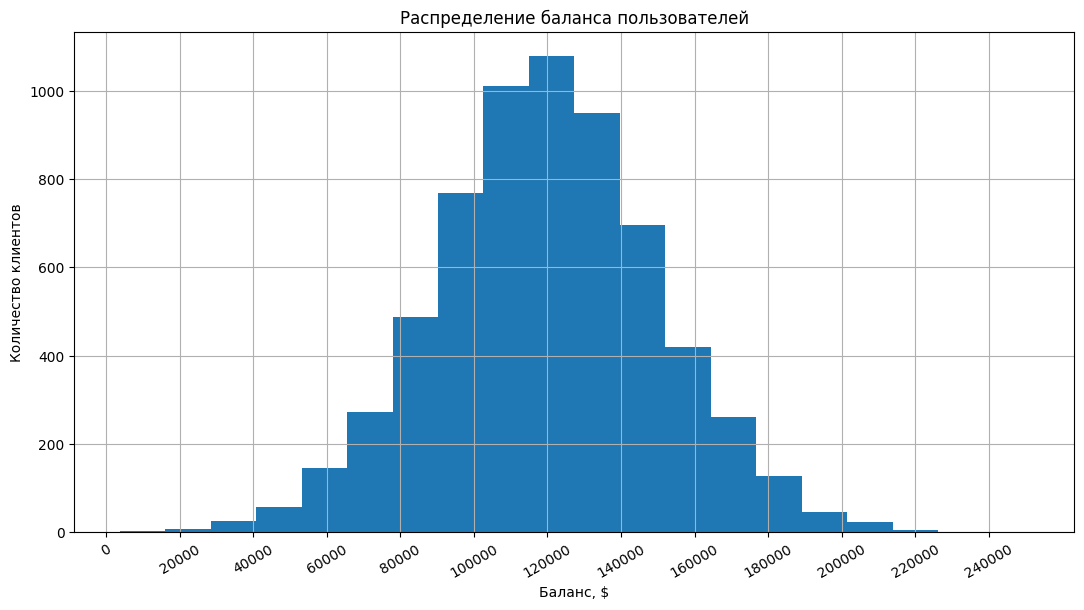

In [155]:
mask = churn_data['Balance'] > 2500 #выбираем пользователей с суммой на счету больше 2500
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=churn_data[mask]['Balance'], bins=20);
axes.set_title('Распределение баланса пользователей')
axes.set_xlabel('Баланс, $');
axes.set_ylabel('Количество клиентов');
axes.set_xticks(range(0, 250000, 20000));
axes.xaxis.set_tick_params(rotation=30);
axes.grid();


Большинство пользователей хранят на счете сумму 100-140 тысяч долларов. С возрастанием и уменьшением суммы на счете, количество клиентов, имеющих на счете такую сумму, линейно убывает.
Уменьшение клиентов с возрастанием суммы понятно, чем больше доход, тем меньше людей им обладающий, хотя разброс 140-220 т. не такой большой.
А уменьшение количества клиентов с уменьшением суммы кажется странным. Возможно банк предлагает плохие условия для клиентов с невысокой суммой на счете. Или нужно смотреть зависимость баланса от предполагаемого дохода.

# 9.3

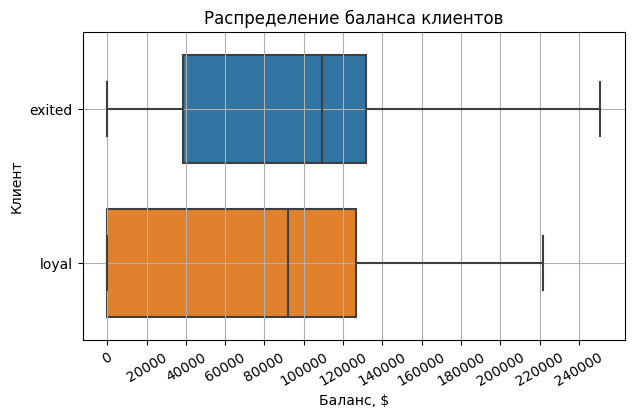

In [160]:
fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='ExitedClient',
    x='Balance',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиентов');
boxplot.set_xlabel('Баланс, $');
boxplot.set_ylabel('Клиент');
boxplot.set_xticks(range(0, 260000, 20000));
boxplot.xaxis.set_tick_params(rotation=30);
boxplot.grid();

Средняя сумма на счету у лояльных клиентов ниже засчет того, что большинство клиентов с суммой менее 40т. лояльны. Беря в расчет предыдующий график, получается что клиентов с небольшой суммой мало, но они практически не уходят. Возможно в банке плохие условия для счетов 40-130т.

# 9.4

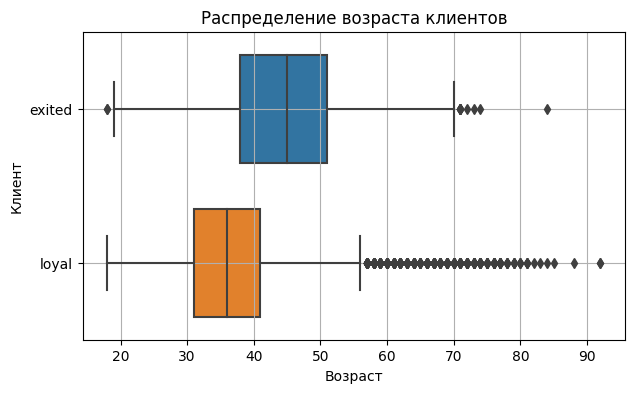

In [86]:
fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='ExitedClient',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Клиент');
boxplot.grid();

Средний возраст ушедших 45 лет, лояльных 35. Прослеживается четкая граница, после 40 клиенты начинают резко сбегать. Банку стоит обратить внимание на то, что происходит с клиентами после 38 лет, возможно кризис среднего возраста. У группы лояльных наблюдается много выбросов после 57 лет.

# 9.5

<Figure size 1000x700 with 0 Axes>

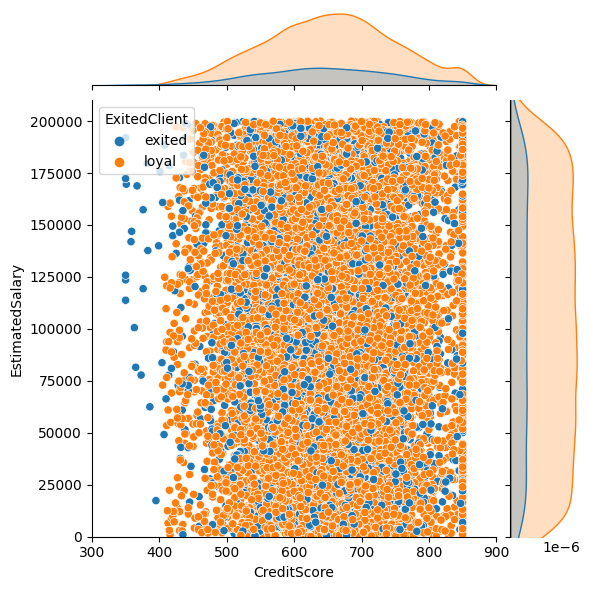

In [169]:
fig = plt.figure(figsize=(10, 7))
jointplot = sns.jointplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary',
    xlim = (300, 900),
    ylim = (0, 210000),
    hue='ExitedClient'
);


Все клиенты с кредитным рейтингом менее 400 уходят. Взаямосвязи между кредитным рейтингом и предполагаемой зарплатой не вижу.

# 9.6

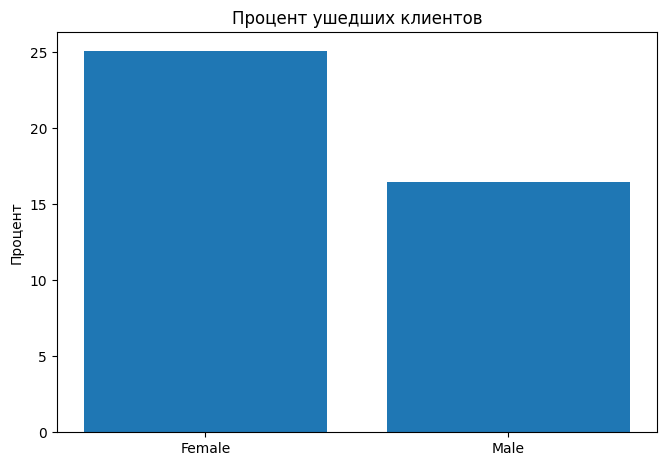

In [167]:
exited_clients = churn_data.groupby('Gender')['Exited'].mean() #вычисляем процент ухода среди мужчин и женщин
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=exited_clients.index, height=exited_clients*100);
axes.set_title('Процент ушедших клиентов');
axes.set_ylabel('Процент');


Женщины уходят чаще.

# 9.7

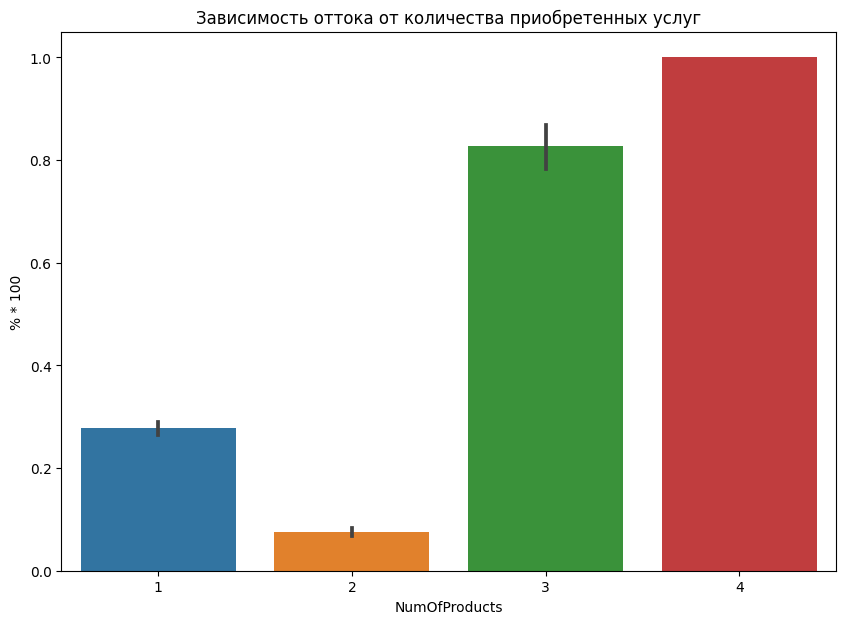

In [187]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited'
);
barplot.set_title('Зависимость оттока от количества приобретенных услуг');
barplot.set_ylabel('% * 100');


Минимальный отток клиентов с 2мя услугами. Большой процент отттока у клиентов с 3мя услугами - более 80%. Все клиенты с 4мя услугами ушли.

# 9.8

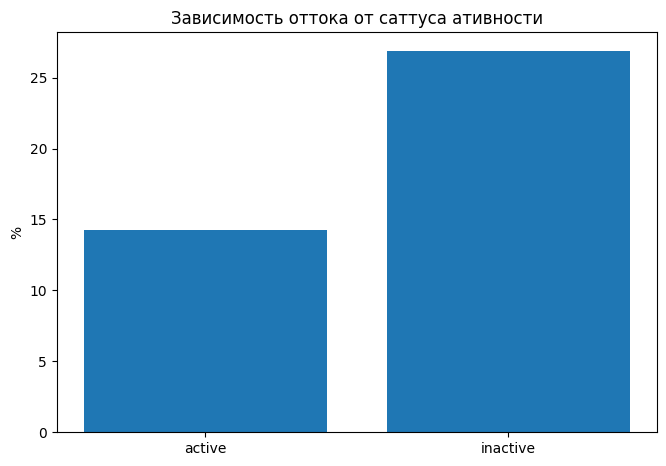

In [191]:
churn_data['ActiveClient'] = churn_data['IsActiveMember'].apply(lambda x: 'inactive' if x==0 else 'active') #новый столбец с обозначением активного/неактивного клиента для подписей на графиках
exited_clients = churn_data.groupby('ActiveClient')['Exited'].mean()*100 #вычисляем процент ухода в зависимости от статуса активности
fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=exited_clients.index, height=exited_clients);
axes.set_title('Зависимость оттока от саттуса ативности');
axes.set_ylabel('%');

Отток клиентов со статусом "активный" меньше. Нужно стимулировать их активность для уменьшения оттока.

# 9.9

In [199]:
exited_clients = churn_data.groupby('Geography')['Exited'].mean()*100 #вычисляем процент ухода в зависимости от географии
fig = px.choropleth(
    data_frame=exited_clients, 
    locations=exited_clients.index, 
    locationmode = "country names", 
    color=exited_clients, 
    color_continuous_scale='Reds',
    title='Процент оттока клиентов по странам',
    width=800,
    height=500
);
fig.show()

В Германии ушедших клиентов в два раза больше чем во Франции или Испании. Возможно это связано с тем что в Германии услугами банка пользуется больше женщин или людей в возрасте более 40 лет.

# 9.10

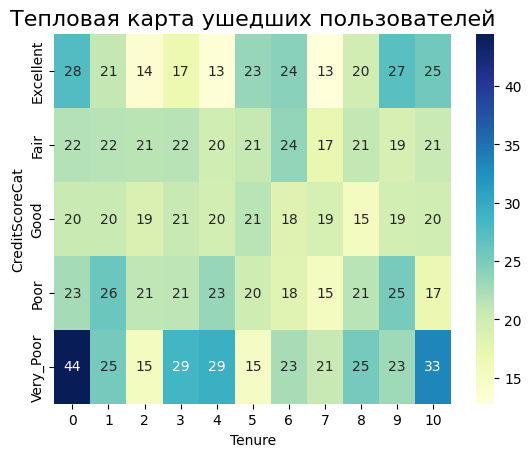

In [202]:
def get_credit_score_cat(credit_score): #функция перевода параметра кредитного рейтинга в категориальный
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) #Создаем новый столбец с категорией кредитного рейтинга клиент
credit_tenure = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc=mean) # сводная таблица зависимости оттока от кредитного рейтинга и количества лет пользования услугами банка
#display(credit_tenure)
heatmap = sns.heatmap(data=credit_tenure*100, cmap='YlGnBu', annot=True)
heatmap.set_title('Тепловая карта ушедших пользователей', fontsize=16);

Чаще всего уходят клиенты с самым низким кредитным рейтингом. Наибольший отток клиентов с низшим рейтингом, пользующимися услугами менее года. Также выше среднего процент оттока среди клиентов с наивысшим кредитным рейтингом, пользующимися услугами банк менее года и более 9 лет.